In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [24]:
business=pd.read_csv('business(1).csv')
business.describe()
pd.DataFrame(business)

,Alcohol_beer_and_wine,Alcohol_full_bar,Alcohol_none,Ambience casual_ False,Ambience casual_ True,Ambience classy_ False,Ambience classy_ True,Ambience hipster_ False,Ambience hipster_ True,Ambience intimate_ False,...,RestaurantsReservations_False,RestaurantsReservations_True,RestaurantsTableService_False,RestaurantsTableService_True,RestaurantsTakeOut_False,RestaurantsTakeOut_True,WiFi_free,WiFi_no,WiFi_paid,stars
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,4.0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,4.5
2,1,0,0,1,0,1,0,1,0,1,...,0,1,0,1,1,0,1,0,0,4.0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,2.0
4,0,0,1,0,1,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,2.5
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.5
6,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,4.0
7,0,1,0,0,1,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,4.0
8,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,3.5
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.5


In [25]:
business['stars'].replace([1.0,1.5,2.0,2.5,3.0,3.5],0,inplace=True)
business['stars'].replace([4,4.0,4.5,5],1,inplace=True)

X= business.drop('stars', axis=1).values
y= business['stars'].values

In [52]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=100)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [53]:
y_pred=classifier.predict(X_test)
y_pred

array([1., 1., 0., ..., 1., 0., 0.])

In [8]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
import webbrowser

dot_data = export_graphviz(classifier, filled=True, rounded=True,out_file=None)

graph = graph_from_dot_data(dot_data)
graph.write_pdf("decision_tree_entropy.pdf")
webbrowser.open_new(r'decision_tree_entropy.pdf')

print ('-'*40 + 'End Console' + '-'*40 + '\n')

----------------------------------------End Console----------------------------------------



Confusion matrix, without normalization
[[5858 2689]
 [3001 2396]]
Normalized confusion matrix
[[0.69 0.31]
 [0.56 0.44]]


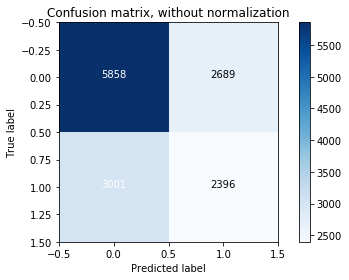

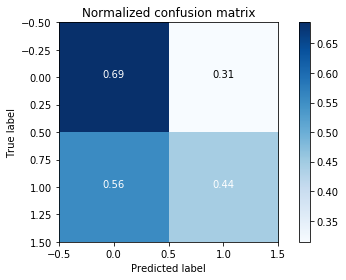

In [54]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm,normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


cm=confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm, title='Confusion matrix, without normalization')



plt.figure()
plot_confusion_matrix(cm, normalize=True, title='Normalized confusion matrix')

plt.show()

In [55]:
from sklearn.metrics import accuracy_score
print( "Accuracy is")
accuracy= accuracy_score(y_test,y_pred)*100
accuracy

Accuracy is


59.19391853126793

In [56]:
classifier_gini=DecisionTreeClassifier(criterion='gini', random_state=100)
classifier_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [57]:
y_pred_gini=classifier_gini.predict(X_test)
y_pred_gini

array([1., 1., 0., ..., 1., 0., 0.])

Confusion matrix, without normalization
[[5858 2689]
 [3001 2396]]
Normalized confusion matrix
[[0.69 0.31]
 [0.56 0.44]]


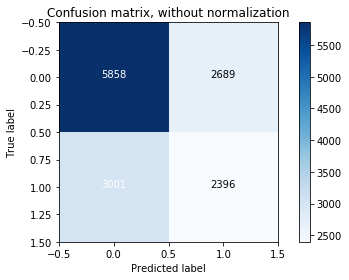

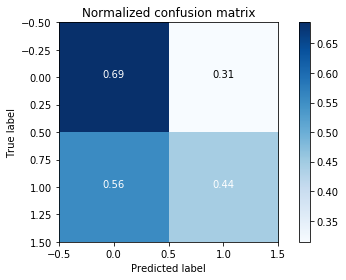

In [58]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_gini)

cm=confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm, title='Confusion matrix, without normalization')



plt.figure()
plot_confusion_matrix(cm, normalize=True, title='Normalized confusion matrix')

plt.show()

In [59]:
print( "Accuracy is")
accuracy= accuracy_score(y_test,y_pred_gini)*100
accuracy

Accuracy is


59.043316121629374